# Factor visualizations

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import torch
import pickle
from src import utils

In [2]:
intensity_scale = 300
cell = 13
resolutions = [2, 5, 10, 20, 30, 40, 50]

## Simulated data

In [3]:
sim_data = torch.load('data/intensity_scale_{}/cell_{}.pkl'.format(intensity_scale, cell))

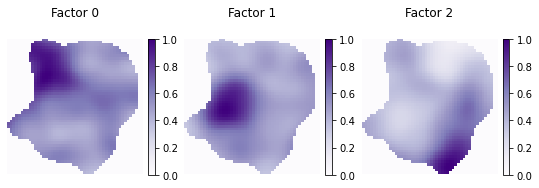

In [4]:
z = sim_data['z'][0]
n_factors = z.shape[0]

fig, axs = plt.subplots(1, n_factors, figsize=(n_factors*3, 3))

cmap = matplotlib.cm.get_cmap('Purples').copy()
cmap.set_under(color='white')

for factor in range(n_factors):
    ax = axs[factor]
    im = ax.matshow(z[factor], origin='lower', cmap=cmap, vmin=0.00)
    ax.axis('off')
    ax.set_title('Factor {}'.format(factor))
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.show()

## FISHFactor

In [5]:
data = pickle.load(open('results/fishfactor/intensity_scale_{}/cell_{}/final/latents.pkl'.format(intensity_scale, cell), 'rb'))

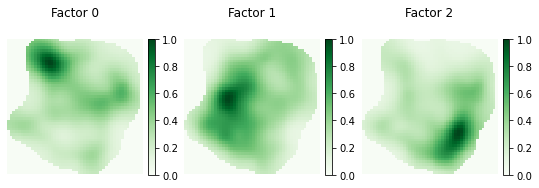

In [6]:
z = data['z'][0]
z = torch.nan_to_num(z, 0)

inds, _ = utils.optimal_assignment(sim_data['z'][0], z, 0)

z = z[inds]

fig, axs = plt.subplots(1, n_factors, figsize=(n_factors*3, 3))

cmap = matplotlib.cm.get_cmap('Greens').copy()
cmap.set_under(color='white')

for factor in range(n_factors):
    ax = axs[factor]
    im = ax.matshow(z[factor] / z[factor].max(), origin='lower', cmap=cmap, vmin=0.00)
    ax.axis('off')
    ax.set_title('Factor {}'.format(factor))
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.show()

## NMF

In [7]:
data_dict = {}

for resolution in resolutions:
    data_dict[resolution] = torch.load('results/nmf/intensity_scale_{}/cell_{}/resolution_{}.pkl'.format(intensity_scale, cell, resolution))

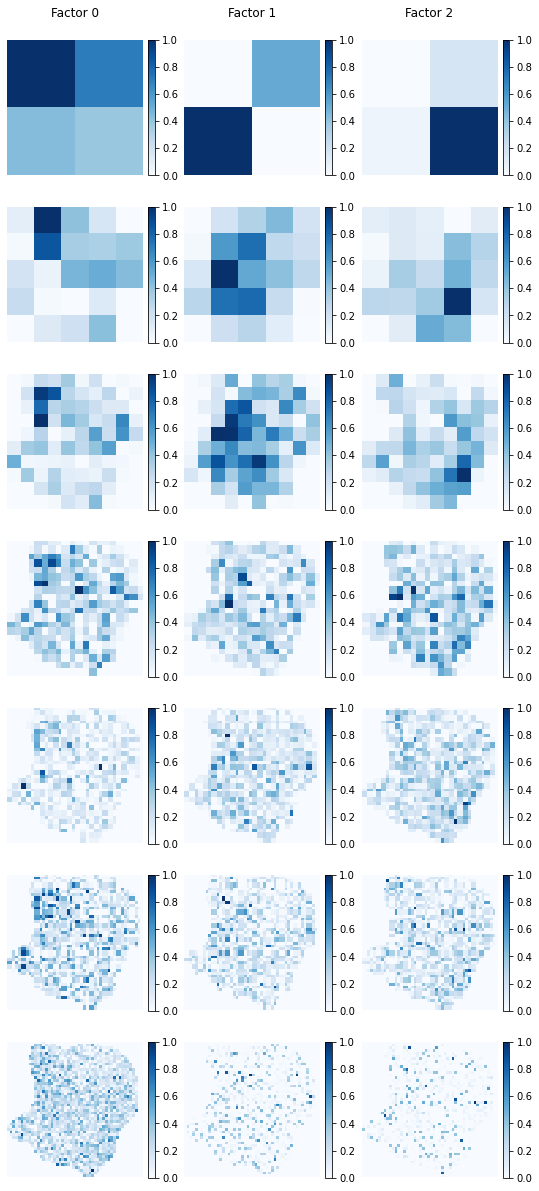

In [8]:
fig, axs = plt.subplots(len(resolutions), n_factors, figsize=(3*n_factors, 3*len(resolutions)))
cmap = matplotlib.cm.get_cmap('Blues').copy()

inds_dict = {}

for i, resolution in enumerate(resolutions):
    data = data_dict[resolution]
    z = data['z']
    z = torch.nan_to_num(z, 0)

    inds_dict[resolution], _ = utils.optimal_assignment(sim_data['z'][0], z, 0)

    z = z[inds_dict[resolution]]

    for factor in range(n_factors):
        ax = axs[i, factor]
        im = ax.matshow(z[factor] / z[factor].max(), origin='lower', cmap=cmap, vmin=0, vmax=1)
        ax.axis('off')
        axs[0, factor].set_title('Factor {}'.format(factor))
        plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.show()

## NSF

In [9]:
data_dict = {}

for resolution in resolutions:
    try:
        data_dict[resolution] = pickle.load(open('results/nsf/intensity_scale_{}/cell_{}/resolution_{}.pkl'.format(intensity_scale, cell, resolution), 'rb'))
    except FileNotFoundError:
        continue

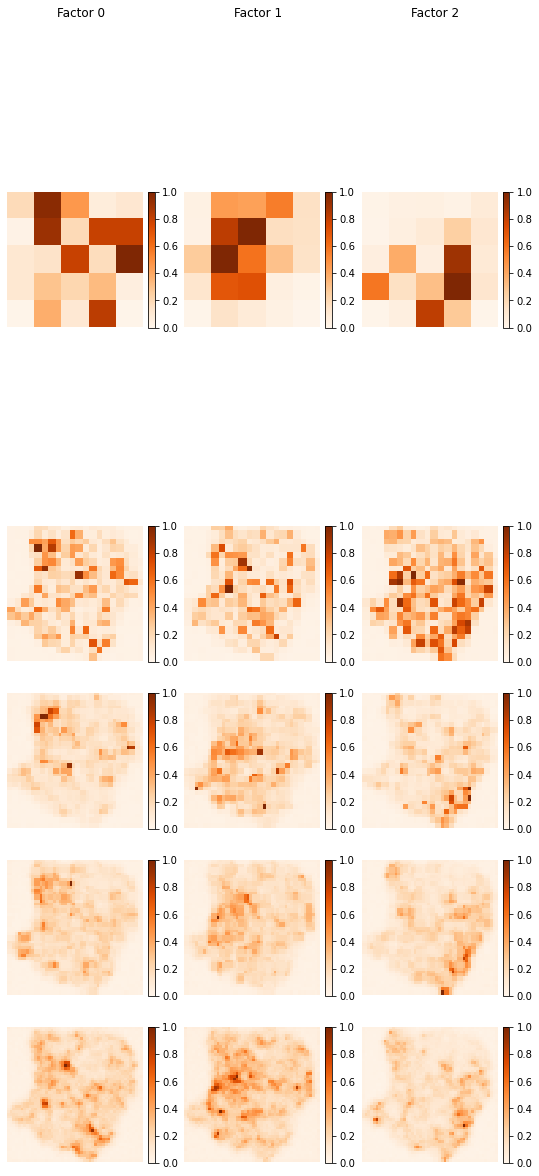

In [10]:
fig, axs = plt.subplots(len(resolutions), n_factors, figsize=(3*n_factors, 3*len(resolutions)))
cmap = matplotlib.cm.get_cmap('Oranges').copy()

inds_dict = {}

for i, resolution in enumerate(resolutions):
    try:
        data = data_dict[resolution]
        z = data['z']
        z = torch.nan_to_num(z, 0)

        inds_dict[resolution], _ = utils.optimal_assignment(sim_data['z'][0], z, 0)

        z = z[inds_dict[resolution]]

        for factor in range(n_factors):
            ax = axs[i, factor]
            im = ax.matshow(z[factor] / z[factor].max(), origin='lower', cmap=cmap, vmin=0, vmax=1)
            ax.axis('off')
            axs[0, factor].set_title('Factor {}'.format(factor))
            plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    except:
        for factor in range(n_factors):
            axs[i, factor].axis('off')
        continue
plt.show()